<a href="https://colab.research.google.com/github/0x31nose/Deep_Learning_Tutorial/blob/master/Creating_NeuralNetowork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ニューラルネットワークの作成
1. データセットの準備と整形
2. ニューラルネットワークの定義
3. 学習と制度の検証

### あやめのデータセットの読み込み

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
for idx, item in enumerate(zip(iris.data, iris.target)):
  if idx == 5:
    break
  print('data', item[0], 'target:', item[1])

data [5.1 3.5 1.4 0.2] target: 0
data [4.9 3.  1.4 0.2] target: 0
data [4.7 3.2 1.3 0.2] target: 0
data [4.6 3.1 1.5 0.2] target: 0
data [5.  3.6 1.4 0.2] target: 0


In [4]:
from sklearn.model_selection import train_test_split
print("length of iris.data:", len(iris.data)) # iris.dataのデータ数
print("length of iris.target:", len(iris.target)) # iris.targetのデータ数

# iris.dataとiris.targetに含まれるデータをシャッフルして分割
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)
print("length of X_train:", len(X_train))
print("length of y_train:", len(y_train))
print("length of X_test:", len(X_test))
print("length of y_test:", len(y_test))

length of iris.data: 150
length of iris.target: 150
length of X_train: 112
length of y_train: 112
length of X_test: 38
length of y_test: 38


In [5]:
for idx, item in enumerate(zip(X_train, y_train)):
  if idx == 5:
    break
  print('data', item[0], 'target:', item[1])

data [6.9 3.1 5.4 2.1] target: 2
data [6.3 2.3 4.4 1.3] target: 1
data [6.3 3.3 6.  2.5] target: 2
data [5.7 2.9 4.2 1.3] target: 1
data [5.1 3.8 1.5 0.3] target: 0


In [6]:
import torch

X_train = torch.from_numpy(X_train).float()
y_train = torch.tensor([[float(x)] for x in y_train])
X_test = torch.from_numpy(X_test).float()
y_test = torch.tensor([[float(x)] for x in y_test])

## ニューラルネットワークの作成
- ある層のノードが次の層の全てのノードと接続されるようなニューラルネットワークを作成する。
- PyTorchではLinearクラス（torch.nn.Linearクラス）を使うことで簡潔に記述できる。
- 以下では、入力データ→入力層→活性化関数→隠れ層→（出力層→）出力という流れを書いてみる

In [7]:
# PyTorchが提供するtorch.nnモジュールをインポートする
from torch import nn

# 入力層、隠れ層、出力の数を変数に代入する
INPUT_FEATURES = 4
HIDDEN = 5
OUTPUT_FEATURES = 1

# nn.Moduleクラス（torch.nn.Moduleクラス）を基底クラスとする
# そうすることで、Pytorchが提供するニューラルネットワークのすべての機能を継承する
# その後に、__init__とforwardの２つのメソッドを定義する
class Net(nn.Module):
  #　基底クラスの__init__メソッドを呼び出して、初期化を行っている
  def __init__(self):
    super().__init__()
    # 入力層を表すインスタンス（入力層→隠れ層）
    self.fc1 = nn.Linear(INPUT_FEATURES, HIDDEN)
    # 隠れ層を表すインスタンス(隠れ層→出力層)
    self.fc2 = nn.Linear(HIDDEN, OUTPUT_FEATURES)

  # ニューラルネットがどのように計算を連ねていくかを定める
  # 入力xを受け取り、self.fc1で処理し、
  # その結果をsigmoid関数（活性化関数）に通して、
  # self.fc2メソッドで処理して、その結果を戻り値としている
  def forward(self, x):
    x = self.fc1(x)
    x = torch.sigmoid(x)
    x = self.fc2(x)
    return x

In [8]:
# とりあえず訓練してないけど使ってみるテスト
net = Net() #

outputs = net(X_train[0:3]) # 訓練データの先頭から３個の要素を入力
print(outputs)
for idx in range(3):
  print('output', outputs[idx], ', label:', y_train[idx])

tensor([[0.1224],
        [0.1605],
        [0.0764]], grad_fn=<AddmmBackward>)
output tensor([0.1224], grad_fn=<SelectBackward>) , label: tensor([2.])
output tensor([0.1605], grad_fn=<SelectBackward>) , label: tensor([1.])
output tensor([0.0764], grad_fn=<SelectBackward>) , label: tensor([2.])


### 学習
#### 学習の概要
- ニューラルネットワークにデータを入力
- 得られる計算結果（推測結果）と正解ラベルを比較
- ニューラルネットワークが持つ重みやバイアスを更新する
- 計算結果と正解ラベルとの誤差を比べる
- 最適化と呼ばれる処置を行う

#### 学習の手順
1. ニューラルネットワークにX_trainに格納したデータを入力する
2. 損失関数を用いて計算結果と正解ラベルとの誤差を計算する
3. 誤差逆伝播や最適化処理によって重みやバイアスを更新
4. １〜３を繰り返す

In [9]:
net = Net()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.003)

EPOCHS = 3000
for epoch in range(EPOCHS):
  optimizer.zero_grad()
  outputs = net(X_train)
  loss = criterion(outputs, y_train)
  loss.backward()
  optimizer.step()

  if epoch % 100 == 99:
    print(f'epoch: {epoch+1:4}, loss: {loss.data}')

print('training finished')

epoch:  100, loss: 0.5581387877464294
epoch:  200, loss: 0.5110146999359131
epoch:  300, loss: 0.4632623493671417
epoch:  400, loss: 0.41357818245887756
epoch:  500, loss: 0.36208245158195496
epoch:  600, loss: 0.3094262182712555
epoch:  700, loss: 0.25751811265945435
epoch:  800, loss: 0.2097214311361313
epoch:  900, loss: 0.16966845095157623
epoch: 1000, loss: 0.138902947306633
epoch: 1100, loss: 0.1164659634232521
epoch: 1200, loss: 0.10041330009698868
epoch: 1300, loss: 0.08892619609832764
epoch: 1400, loss: 0.08061496168375015
epoch: 1500, loss: 0.07449013739824295
epoch: 1600, loss: 0.06986870616674423
epoch: 1700, loss: 0.06628742069005966
epoch: 1800, loss: 0.06343546509742737
epoch: 1900, loss: 0.06110532954335213
epoch: 2000, loss: 0.05915806069970131
epoch: 2100, loss: 0.05749942734837532
epoch: 2200, loss: 0.05606427788734436
epoch: 2300, loss: 0.054806482046842575
epoch: 2400, loss: 0.053692419081926346
epoch: 2500, loss: 0.05269705504179001
epoch: 2600, loss: 0.0518011078

In [10]:
# 学習前に行った結果よりかは近しい値が出力されている。
for idx, item in enumerate(zip(outputs, y_train)):
  if idx == 5:
    break
  print(item[0].data, '<-->', item[1])

tensor([1.6383]) <--> tensor([2.])
tensor([1.2728]) <--> tensor([1.])
tensor([2.0380]) <--> tensor([2.])
tensor([1.2186]) <--> tensor([1.])
tensor([-0.0398]) <--> tensor([0.])


In [11]:
predict = (outputs + 0.5).int()
for idx, item in enumerate(zip(predict, y_train)):
  if idx == 5:
    break
  print('output:', item[0], ', label:', item[1])

output: tensor([2], dtype=torch.int32) , label: tensor([2.])
output: tensor([1], dtype=torch.int32) , label: tensor([1.])
output: tensor([2], dtype=torch.int32) , label: tensor([2.])
output: tensor([1], dtype=torch.int32) , label: tensor([1.])
output: tensor([0], dtype=torch.int32) , label: tensor([0.])


In [12]:
compare = predict == y_train
print(compare[0:5])
print("Accuracy:", int(compare.sum())/112)

tensor([[True],
        [True],
        [True],
        [True],
        [True]])
Accuracy: 0.9821428571428571


In [13]:
outputs = net(X_test)

predict = (outputs + 0.5).int()
compare = predict == y_test

print(f'correct: {compare.sum()} / {len(predict)}')
for value, label in zip(predict, y_test):
  print('predicted:', iris.target_names[value.item()], '<--->',
        'label:', iris.target_names[int(label.item())])

correct: 37 / 38
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: virginica <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: setosa <---> label: setosa
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: virginica <---> label: virginica
predicted: versicolor <---> label: versicolor
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: setosa <---> label: setosa
predicted: versicolor <---> label: versicolor
predicted: versicolor <---> label: versicolor
predic

###  重みとバイアス

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
from torch import nn

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

X_train = torch.from_numpy(X_train).float()
y_train = torch.tensor([[float(x)] for x in y_train])
X_test = torch.from_numpy(X_test).float()
y_test = torch.tensor([[float(x)] for x in y_test])

INPUT_FEATURES = 4
HIDDEN = 5
OUTPUT_FEATURES = 1

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(INPUT_FEATURES, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, OUTPUT_FEATURES)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        return x

In [15]:
x = X_train[0]
print('x:', x)

result = net.fc1.forward(x)
print(result)

x: tensor([6.1000, 3.0000, 4.9000, 1.8000])
tensor([ 0.5931, -0.6618, -0.7113,  0.9908,  2.3427], grad_fn=<AddBackward0>)


In [34]:
# Netクラスのインスタンスのインスタン変数FC１が持つ重みとバイアスを表示する
net = Net()

print('weight')
print(net.fc1.weight)
print('bias')
print(net.fc1.bias)

print("test")
print(net.fc1.weight)

weight
Parameter containing:
tensor([[-0.0981, -0.4471,  0.2553,  0.2363],
        [ 0.2650,  0.3900,  0.4507, -0.3410],
        [ 0.4524, -0.1798, -0.4187,  0.1710],
        [-0.4384,  0.2881, -0.3333, -0.2789],
        [-0.3786, -0.2126, -0.2127, -0.4238]], requires_grad=True)
bias
Parameter containing:
tensor([ 0.2601, -0.4526,  0.4828,  0.2571,  0.3562], requires_grad=True)
test
Parameter containing:
tensor([[-0.0981, -0.4471,  0.2553,  0.2363],
        [ 0.2650,  0.3900,  0.4507, -0.3410],
        [ 0.4524, -0.1798, -0.4187,  0.1710],
        [-0.4384,  0.2881, -0.3333, -0.2789],
        [-0.3786, -0.2126, -0.2127, -0.4238]], requires_grad=True)


RuntimeError: ignored

# y = w * x で考えてみる

In [16]:
# 入力層の重みを変数wに、入力層のバイアスを変数bに代入しておく　
w = net.fc1.weight
b = net.fc1.bias

In [17]:
o0 = w[0][0] * x[0] + w[0][1] * x[1] + w[0][2] * x[2] + w[0][3] * x[3] + b[0]
o1 = w[1][0] * x[0] + w[1][1] * x[1] + w[1][2] * x[2] + w[1][3] * x[3] + b[1]
o2 = w[2][0] * x[0] + w[2][1] * x[1] + w[2][2] * x[2] + w[2][3] * x[3] + b[2]
o3 = w[3][0] * x[0] + w[3][1] * x[1] + w[3][2] * x[2] + w[3][3] * x[3] + b[3]
o4 = w[4][0] * x[0] + w[4][1] * x[1] + w[4][2] * x[2] + w[4][3] * x[3] + b[4]
print(o0.data, o1.data, o2.data, o3.data, o4.data)

tensor(0.5931) tensor(-0.6618) tensor(-0.7113) tensor(0.9908) tensor(2.3427)


In [18]:
o = w @ x + b
print(o)

tensor([ 0.5931, -0.6618, -0.7113,  0.9908,  2.3427], grad_fn=<AddBackward0>)


In [19]:
# 学習を一度だけ行い、入力層の重みとバイアスがどう変化したかを確認する
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.03)

print('before learning')
print('weight')
print(net.fc1.weight)

print('learn once')
outputs = net(X_train)
loss = criterion(outputs, y_train)
loss.backward()
optimizer.step()

print('after learning')
print('weight')
print(net.fc1.weight)

before learning
weight
Parameter containing:
tensor([[-0.5243, -0.4489,  0.8814,  0.3233],
        [ 0.3368, -0.1935, -0.3962,  0.0037],
        [ 0.3273,  0.3274, -0.6309, -0.5168],
        [-0.2088, -0.0252,  0.3737,  0.4314],
        [ 0.3310, -0.1945,  0.0576,  0.1626]], requires_grad=True)
learn once
after learning
weight
Parameter containing:
tensor([[-0.5272, -0.4503,  0.8804,  0.3237],
        [ 0.3368, -0.1935, -0.3963,  0.0036],
        [ 0.3286,  0.3280, -0.6304, -0.5169],
        [-0.2102, -0.0257,  0.3730,  0.4316],
        [ 0.3309, -0.1945,  0.0576,  0.1626]], requires_grad=True)


In [20]:
import torch

w = torch.tensor([[1.95]], requires_grad=True) # aaa
t = torch.tensor([[2.0]]) # aaa
x = torch.tensor([1.0])

def f(x):
  return w * x

print('w:', w)
print('t:', t)

w: tensor([[1.9500]], requires_grad=True)
t: tensor([[2.]])


### 平均二乗誤差を考える
- MSE：　Mean Squared Error
- 同じインデックス位置にある２つの要素で減算を行った結果を二乗する
- それらの要素の誤差として考え、ベクトルの全要素についてそれらを計算する
- それらの総和を要素数で割った値を求める


In [21]:

criterion = torch.nn.MSELoss()

y = f(x)
loss = criterion(y, t)
print(loss.data)

tensor(0.0025)


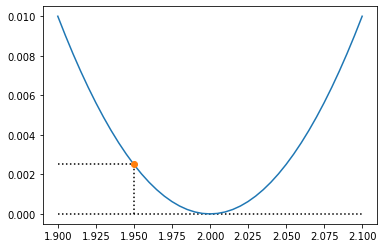

In [22]:
# 損失を計算する関数
# 勾配がマイナスなら重みを増加させて、プラスなら減少させていけばよい。
import matplotlib.pyplot as plt

def calc_loss(output, label):
    return (output - label) ** 2

# 1.9～2.1の範囲の重みwに対し、関数f(x)にx＝1を与えたときの計算結果
output = torch.arange(1.9, 2.1, 0.005)

LABEL = 2

myloss = calc_loss(output, LABEL)
plt.plot(output, myloss)
plt.plot(1.95, calc_loss(1.95, LABEL), marker='o')
plt.hlines(0, 1.9, 2.1, linestyle=':')
plt.hlines(0.0025, 1.9, 1.95, linestyle=':')
plt.vlines(1.95, 0, 0.0025, linestyle=':')
plt.show()

# 重みの変換

In [71]:
import numpy as np

array = net.fc1.weight 
a, b = net.fc1.weight.shape

# 2次元配列→1次元配列
print('2次元配列→1次元配列')
c = array.detach().numpy().ravel()
print(c)

# 1次元配列→2次元配列
print('1次元配列→2次元配列')
d = c.reshape(a, b)
print(d)

2次元配列→1次元配列
[-0.09811467 -0.44712853  0.2552538   0.23629457  0.2650035   0.39002073
  0.45068324 -0.3409896   0.45240152 -0.17978102 -0.41865218  0.17095816
 -0.43841827  0.2880792  -0.33332747 -0.27892    -0.3786285  -0.2126087
 -0.21270788 -0.42376012]
1次元配列→2次元配列
[[-0.09811467 -0.44712853  0.2552538   0.23629457]
 [ 0.2650035   0.39002073  0.45068324 -0.3409896 ]
 [ 0.45240152 -0.17978102 -0.41865218  0.17095816]
 [-0.43841827  0.2880792  -0.33332747 -0.27892   ]
 [-0.3786285  -0.2126087  -0.21270788 -0.42376012]]
